In [1]:
import os

import numpy as np
import math
import uproot as uproot
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import gridspec
#import dunestyle.matplotlib as dunestyle

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import median_abs_deviation
from scipy import integrate
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import scipy.linalg as la
import scipy.optimize as opt
from scipy.optimize import Bounds, LinearConstraint
from scipy.stats import chisquare

from landaupy import langauss

from branches import *
from pandas_helpers import *
from dEdx_helper import *

In [10]:
mass_muon = 105.658 # [MeV]                                                                                                                                                                                                                                          
mass_pion = 139.57 # [MeV]                                                                                                                                                                                                                                           
mass_proton = 938.272 # [MeV]

In [2]:
def return_likelihood(mass, KE, pitch, dedx):
    this_dedx_helper = dEdx_helper(mass, KE, pitch)
    this_likelihood = this_dedx_helper.dEdx_pdf(dedx)
    return this_likelihood

In [12]:
test_dedx_helper = dEdx_helper(139.570, 200, 0.65)
print(test_dedx_helper.Landau_xi()/test_dedx_helper.Get_Wmax())

print(test_dedx_helper.dEdx_pdf(2.2))
print(type(return_likelihood(139.570, 200, 0.65,2.2)))

integral = integrate.quad(lambda x: test_dedx_helper.dEdx_pdf(x), 0, 10)
print(integral)

0.015226562636606971
0.5975106916589585
<class 'float'>
(0.9998418911773029, 1.1413736659763215e-08)


In [9]:
def draw_pdf(mass, ke, pitch):
    this_dedx_helper = dEdx_helper(mass, ke, pitch)
    # Define x-axis range for the PDF
    xx_1 = np.linspace(0, 2 * this_dedx_helper.dEdx_mean(), 1000)

    # Compute PDF values
    dEdx_pdf_arr_1 = [this_dedx_helper.dEdx_pdf(x) for x in xx_1]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(xx_1, dEdx_pdf_arr_1, color="orange", label=r"$dE/dx$ PDF curve")
    plt.xlabel(r"$dE/dx$ [MeV/cm]")
    plt.ylabel("Probability Density")
    plt.title("dE/dx PDF")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

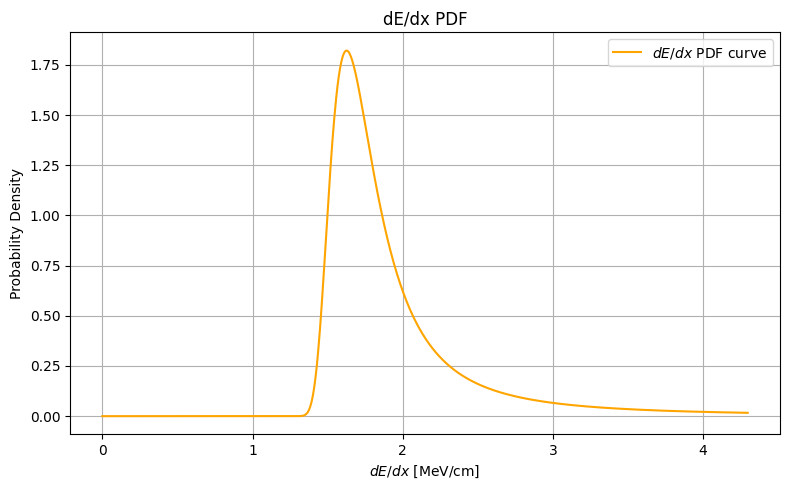

In [11]:
draw_pdf(mass_muon, 500., 0.5)